In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import tensorflow as tf

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Dropout

Using TensorFlow backend.


In [84]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [30]:
dataset = pd.read_csv("../data/4_64points.txt")

In [31]:
dataset.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,gesture
0,7.0,70.0,21.0,1.0,3.0,4.0,1.0,11.0,5.0,60.0,...,25.0,5.0,73.0,28.0,26.0,8.0,21.0,44.0,40.0,0
1,67.0,73.0,11.0,22.0,18.0,8.0,16.0,13.0,72.0,10.0,...,43.0,32.0,52.0,11.0,26.0,13.0,7.0,35.0,10.0,0
2,29.0,32.0,9.0,0.0,7.0,5.0,52.0,34.0,12.0,59.0,...,0.0,0.0,90.0,12.0,1.0,7.0,2.0,10.0,1.0,0
3,43.0,37.0,11.0,123.0,3.0,14.0,25.0,3.0,48.0,79.0,...,9.0,33.0,11.0,3.0,56.0,4.0,2.0,1.0,17.0,0
4,39.0,21.0,8.0,72.0,9.0,10.0,9.0,5.0,53.0,40.0,...,34.0,82.0,9.0,24.0,6.0,5.0,7.0,12.0,4.0,0


In [32]:
dataset = dataset.dropna()
dataset_train = np.array(dataset)
dataset_train = dataset_train[np.random.permutation(len(dataset_train))]
X_train = dataset_train[:,:-1]
Y_train = dataset_train[:,-1:]

In [33]:
Y_train = [int(i) for i in Y_train]
Y_train = np.eye(np.max(Y_train) + 1)[Y_train]
Y_train.shape

(4196, 4)

In [34]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [36]:
X_train = X_train.reshape(4196,8,8)

In [39]:
for graph in X_train:
    for i in range(8):
        m = max(graph[i])
        for j in range(8):
            graph[i][j] = graph[i][j]/m

In [68]:
X_train = X_train.reshape(4196,64)

In [69]:
X_train.shape

(4196, 64)

In [70]:
Y_train.shape

(4196, 4)

In [78]:
model = Sequential()

model.add(Dense(64, input_shape=X_train[0].shape))
#model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

In [79]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(X_train, Y_train,validation_split=0.2, epochs = 100, batch_size = 32, verbose=2)

Train on 3356 samples, validate on 840 samples
Epoch 1/100
 - 0s - loss: 0.1401 - accuracy: 0.9466 - val_loss: 0.0530 - val_accuracy: 0.9815
Epoch 2/100
 - 0s - loss: 0.0723 - accuracy: 0.9759 - val_loss: 0.0505 - val_accuracy: 0.9818
Epoch 3/100
 - 0s - loss: 0.0665 - accuracy: 0.9798 - val_loss: 0.0535 - val_accuracy: 0.9824
Epoch 4/100
 - 0s - loss: 0.0718 - accuracy: 0.9755 - val_loss: 0.0525 - val_accuracy: 0.9821
Epoch 5/100
 - 0s - loss: 0.0572 - accuracy: 0.9806 - val_loss: 0.0520 - val_accuracy: 0.9812
Epoch 6/100
 - 0s - loss: 0.0648 - accuracy: 0.9782 - val_loss: 0.0557 - val_accuracy: 0.9804
Epoch 7/100
 - 0s - loss: 0.0587 - accuracy: 0.9785 - val_loss: 0.0504 - val_accuracy: 0.9812
Epoch 8/100
 - 0s - loss: 0.0575 - accuracy: 0.9800 - val_loss: 0.0582 - val_accuracy: 0.9792
Epoch 9/100
 - 0s - loss: 0.0589 - accuracy: 0.9796 - val_loss: 0.0641 - val_accuracy: 0.9768
Epoch 10/100
 - 0s - loss: 0.0570 - accuracy: 0.9809 - val_loss: 0.0500 - val_accuracy: 0.9812
Epoch 11/100

Epoch 87/100
 - 0s - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.0587 - val_accuracy: 0.9801
Epoch 88/100
 - 0s - loss: 0.0452 - accuracy: 0.9841 - val_loss: 0.0656 - val_accuracy: 0.9780
Epoch 89/100
 - 0s - loss: 0.0416 - accuracy: 0.9858 - val_loss: 0.0660 - val_accuracy: 0.9762
Epoch 90/100
 - 0s - loss: 0.0387 - accuracy: 0.9865 - val_loss: 0.0581 - val_accuracy: 0.9768
Epoch 91/100
 - 0s - loss: 0.0424 - accuracy: 0.9850 - val_loss: 0.0653 - val_accuracy: 0.9762
Epoch 92/100
 - 0s - loss: 0.0440 - accuracy: 0.9841 - val_loss: 0.0603 - val_accuracy: 0.9795
Epoch 93/100
 - 0s - loss: 0.0410 - accuracy: 0.9862 - val_loss: 0.0612 - val_accuracy: 0.9807
Epoch 94/100
 - 0s - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0572 - val_accuracy: 0.9789
Epoch 95/100
 - 0s - loss: 0.0404 - accuracy: 0.9868 - val_loss: 0.0581 - val_accuracy: 0.9807
Epoch 96/100
 - 0s - loss: 0.0426 - accuracy: 0.9850 - val_loss: 0.0670 - val_accuracy: 0.9780
Epoch 97/100
 - 0s - loss: 0.0424 - accuracy: 0.98

Text(0.5, 1.0, 'Accuracy')

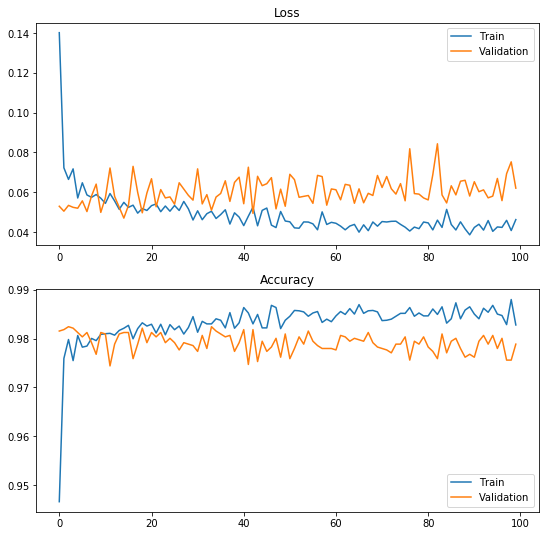

In [124]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["Train","Validation"])
plt.title("Loss")
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["Train","Validation"])
plt.title("Accuracy")

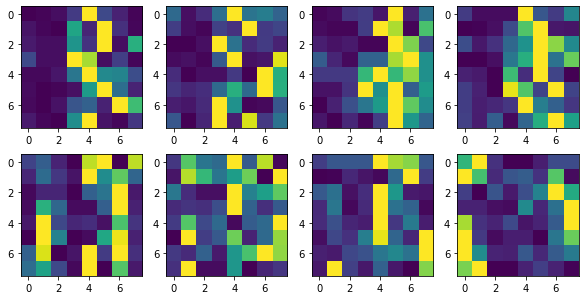

In [123]:
plt.figure(figsize=[10,5])
plt.subplot(2,4,1)
plt.imshow(X_train[0].reshape(8,8))
plt.subplot(2,4,2)
plt.imshow(X_train[3].reshape(8,8))
plt.subplot(2,4,3)
plt.imshow(X_train[4].reshape(8,8))
plt.subplot(2,4,4)
plt.imshow(X_train[6].reshape(8,8))
plt.subplot(2,4,5)
plt.imshow(X_train[26].reshape(8,8))
plt.subplot(2,4,6)
plt.imshow(X_train[29].reshape(8,8))
plt.subplot(2,4,7)
plt.imshow(X_train[17].reshape(8,8))
plt.subplot(2,4,8)
plt.imshow(X_train[18].reshape(8,8))

In [118]:
Y_train[29]

array([0., 0., 0., 1.])